# TFM2 Exploración y análisis de datos

## Introducción

Uno de los desafios mas importantes de un departamento de Recursos Humanos y en general de cualquier responsable de una empresa es conocer que variables influyen para mejorar el trabajo y grado de satisfacción de los empleados. 
Conociendo como influyen y se relacionan estas variables,se podrían poner en marcha acciones enfocadas a:

1. **Mejora la productividad de los empleados** y por lo tanto aumentar la competitividad de la compañía. (enfoque estratégico de la compañía)
2. **Mejorar el grado de satisfacción de los empleados y el descenso del abandono ** evitando que los empleados busquen otras empresas que le ofrezcan un entorno de trabajo y condiciones mejores. (Enfoque social y productivo)

En este NoteBook vamos a analizar el conjunto de datos del Dataset utilizando diferentes herramientas y enfoques para poder analizar todos los datos y la relación que tienen entre ellos.

Con el conocimiento,de este tipo de herramientas y análisis, un departamento de administración y recursos humanos puede tomar medidas para minimizar el número de despidos o abandonos. De esta forma se podrá analizar y actuar de forma anticipada sobre variables como ajustes en el entorno laboral, prácticas de contratación, número de capacitaciones por año, horarios de trabajo, salario de los empleados, etc.


In [1]:
# Librerias analíticas

import numpy as np # Algebra lineal
import pandas as pd # Proceso de datos
import seaborn as sns # libreria de visualización de datos
import matplotlib.pyplot as plt # librerías de gráficos
%matplotlib inline

# Libreria plotly
# ! pip install plotly # Necesario la primera vez
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Tratamiento de warnings
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('always')  Solo para la validación

In [2]:
# Carga del Dataset DataSetRH3_tm.csv

datasetRH = pd.read_csv("./Data/DataSetRH3_tm.csv", delimiter=";")
datasetRH.head()

,Edad,Distancia_Casa,Genero,Estado,Id_empleado,Titulacion,Especializacion,Puesto,Departamento,Rol_laboral,...,Formacion_año_anterior,Años_sin_promocion,Años_Jefe_actual,ParticipacionLaboral,Conciliacion-Laboral-Personal,Calificacion_Desempeño,Satisfaccion_General,Satisfaccion_Personal,Satisfaccion_Laboral,Abandono
0,41,1,Mujer,Soltero,1,Tecnico,Fisicas,Tecnico,Operaciones & Desarrollo,Tecnico,...,0,0,5,Alta,Mala,Excelente,Media,Bajo,Muy Alta,Si
1,49,8,Hombre,Casado,2,FP,Mod. Informatica,Tecnico,Operaciones & Desarrollo,Consultor,...,3,1,7,Media,Muy Buena,Sobresaliente,Alta,Muy Alta,Media,No
2,37,2,Hombre,Soltero,4,Tecnico,Otros,Tecnico,Operaciones & Desarrollo,Analista-Prog,...,3,0,0,Media,Muy Buena,Excelente,Muy Alta,Media,Alta,Si
3,33,3,Mujer,Casado,5,Master,Fisicas,Tecnico,Operaciones & Desarrollo,Tecnico,...,3,3,0,Alta,Muy Buena,Excelente,Muy Alta,Alta,Alta,No
4,27,2,Hombre,Casado,7,FP,Mod. Informatica,Tecnico,Operaciones & Desarrollo,Tecnico,...,3,2,2,Alta,Muy Buena,Excelente,Baja,Muy Alta,Media,No


**Comentario:** Tras la fase de carga y adaptación del Dataset, nos encontramos con una serie de datos numéricos y categóricos. 
Vamos a realizar una serie de comprobaciones  sencillas como es la integridad de los datos para ver si hay valores nulos o infinitos

In [3]:
datasetRH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Edad                             1470 non-null int64
Distancia_Casa                   1470 non-null int64
Genero                           1470 non-null object
Estado                           1470 non-null object
Id_empleado                      1470 non-null int64
Titulacion                       1470 non-null object
Especializacion                  1470 non-null object
Puesto                           1470 non-null object
Departamento                     1470 non-null object
Rol_laboral                      1470 non-null object
Antiguedad_empresa               1470 non-null int64
Antiguedad_puesto                1470 non-null int64
Frecuencia_Viajes                1470 non-null object
Ingresos_mensuales               1470 non-null int64
Tarifa_hora                      1470 non-null int64
Tarifa_Mes                       1470 non-null int64
Tarifa_Diaria                    1470

## Análisis general de todas las variables por grupos

Vamos a representar las variables en cuatro grupos, para posteriormente analizarlos y obtener las primeras conclusiones.
- Datos Personales
- Datos Profesionales
- Datos Economicos
- Grados de Satisfacción y Desempeño

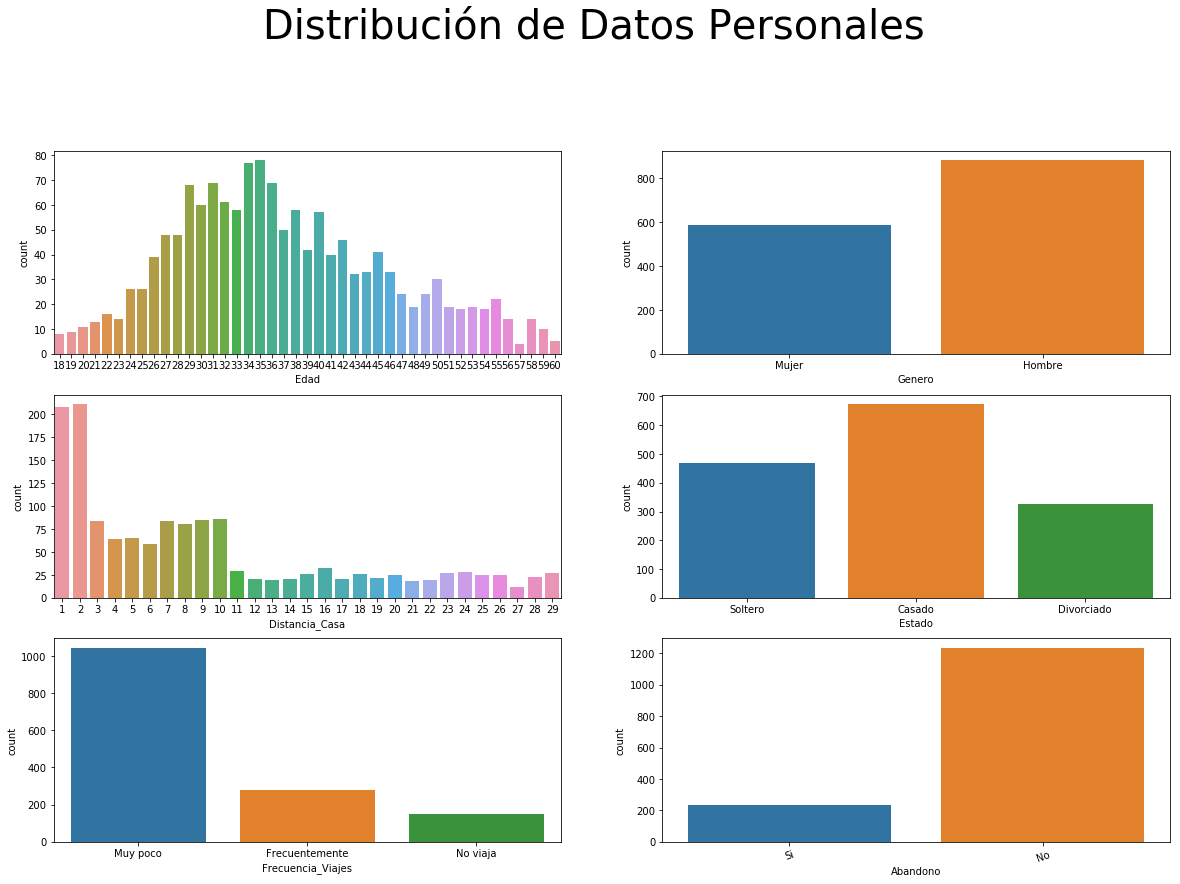

In [4]:
fig,ax = plt.subplots(3,2, figsize=(20,20))             
plt.suptitle("Distribución de Datos Personales", fontsize=40)
sns.countplot(datasetRH['Edad'], ax = ax[0,0]) 
sns.countplot(datasetRH['Genero'], ax = ax[0,1])
sns.countplot(datasetRH['Distancia_Casa'], ax = ax[1,0]) 
sns.countplot(datasetRH['Estado'], ax = ax[1,1])
sns.countplot(datasetRH['Frecuencia_Viajes'], ax = ax[2,0])
sns.countplot(datasetRH['Abandono'], ax = ax[2,1])
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

**Análisis Datos Personales**

Tras las gráficas anteriores podemos obtener de forma general las siguientes conclusiones:

**Edad:** Existe una buena distribución de edades. Hay empleados entre los 18 y 60 años, estando la mayor concentracion de edad entre los 25-45, lo que podemos considerar que existe una combinación de experiencia y juventud.

**Género:** Aunque hay mas hombres que mujeres, para ser un empresa del sector de las TIC existe un equilibrio entre hombres y mujeres.

**Distancia al trabajo:** Todos los empleados se encuentran a menos de 30 km del trabajo,estando la mayoría a menos de 10 km del trabajo. Si los medios de transporte son buenos, podemos considerarlo un buen indicador.

**Estado civil:** El mayor porcentaje corresponde a empleados casados y solteros. De nuevo parece que en este apartado exista un equilibrio.

**Frecuencia de viajes:** La mayoria de los empleados no viaja o viaja muy poco. Por el porcentaje de empleados que viajan frecuentemente podemos considerar que en su mayoria son del departamento comercial, operaciones o puestos ejecutivos.

**Abandono:** El porcentaje de abandono no es excesivamente alto para ser una empresa del sector TIC. Este indicador lo iremos analizando en otros apartados.

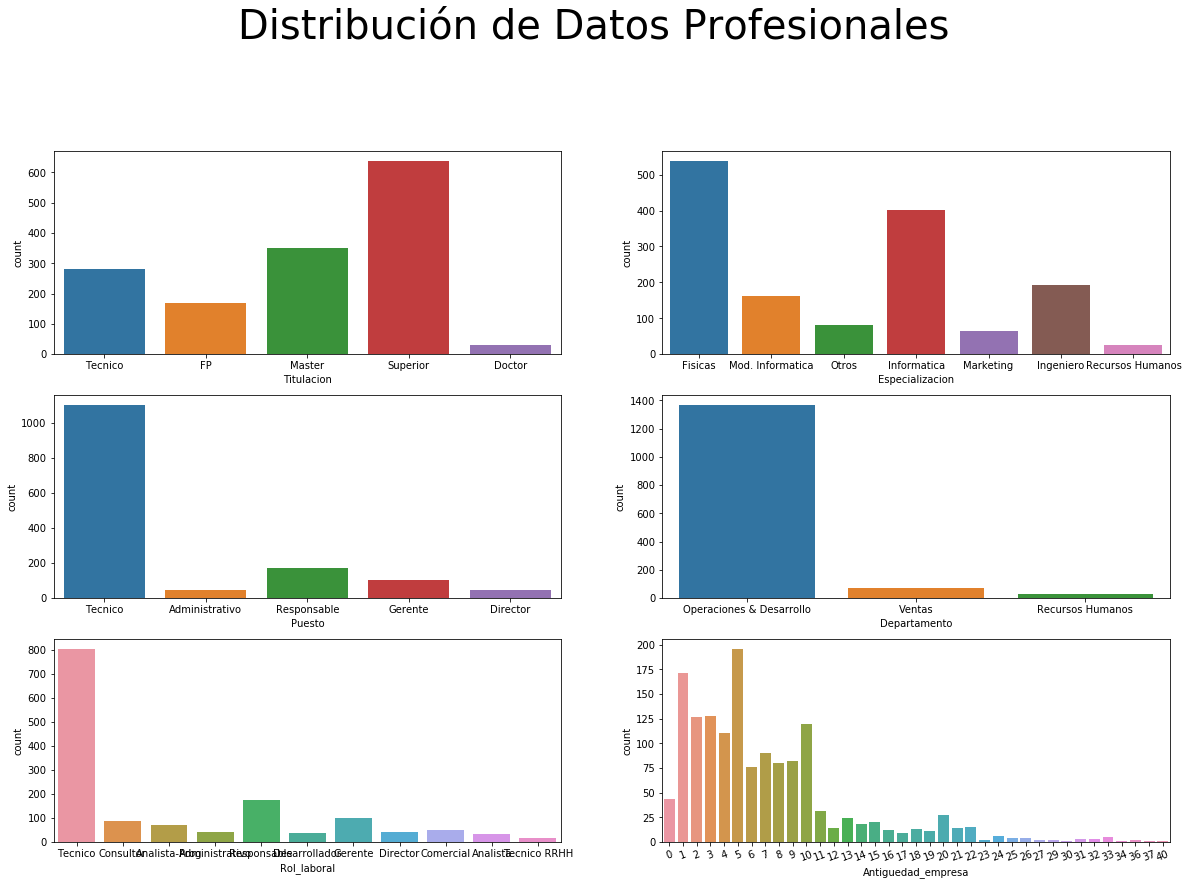

In [5]:
fig,ax = plt.subplots(3,2, figsize=(20,20))             
plt.suptitle("Distribución de Datos Profesionales", fontsize=40)
sns.countplot(datasetRH['Titulacion'], ax = ax[0,0]) 
sns.countplot(datasetRH['Especializacion'], ax = ax[0,1])
sns.countplot(datasetRH['Puesto'], ax = ax[1,0]) 
sns.countplot(datasetRH['Departamento'], ax = ax[1,1])
sns.countplot(datasetRH['Rol_laboral'], ax = ax[2,0])
sns.countplot(datasetRH['Antiguedad_empresa'], ax = ax[2,1])
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

**Análisis Datos Profesionales**

**Titulación:** La mayoría de los empleados tienen título universitario, lo que indica que la preparación académica es importante para la compañía.

**Especialización:** La especialización es bastante alta ya que la mayoría de los empleados tienen especialidades de Físicas, Informática o Ingenierias.

**Puesto:** La mayoría de los puestos son técnicos. El resto de empleados de puestos que podemos considerar de la estructura, son relativamente bajos, lo que implica que la estructura de la compañía no es alta y este indicador influirá favorablemente en los beneficios.

**Departamento:** Como en el caso anterior el número de empleados del departamento operativo es mucho mayor que el resto de departamentos. Implica que la compañía tiene una estructura reducida y acorde al departamento de operaciones. 

**Rol laboral:** Los roles que mas predominan son técnicos que podemos considerar que es donde se centra el core de la compañía.

**Antigüedad en la empresa:** La mayoría de los empleados se encuentan dentro de una antigüedad en la compañía que no sobrepasa los 10 años. Dado que hay gente que lleba 40 años, parece indicar que en los ultimos 10 años ha habido muchas incoporaciones y posiblemente un fuerte crecimiento.


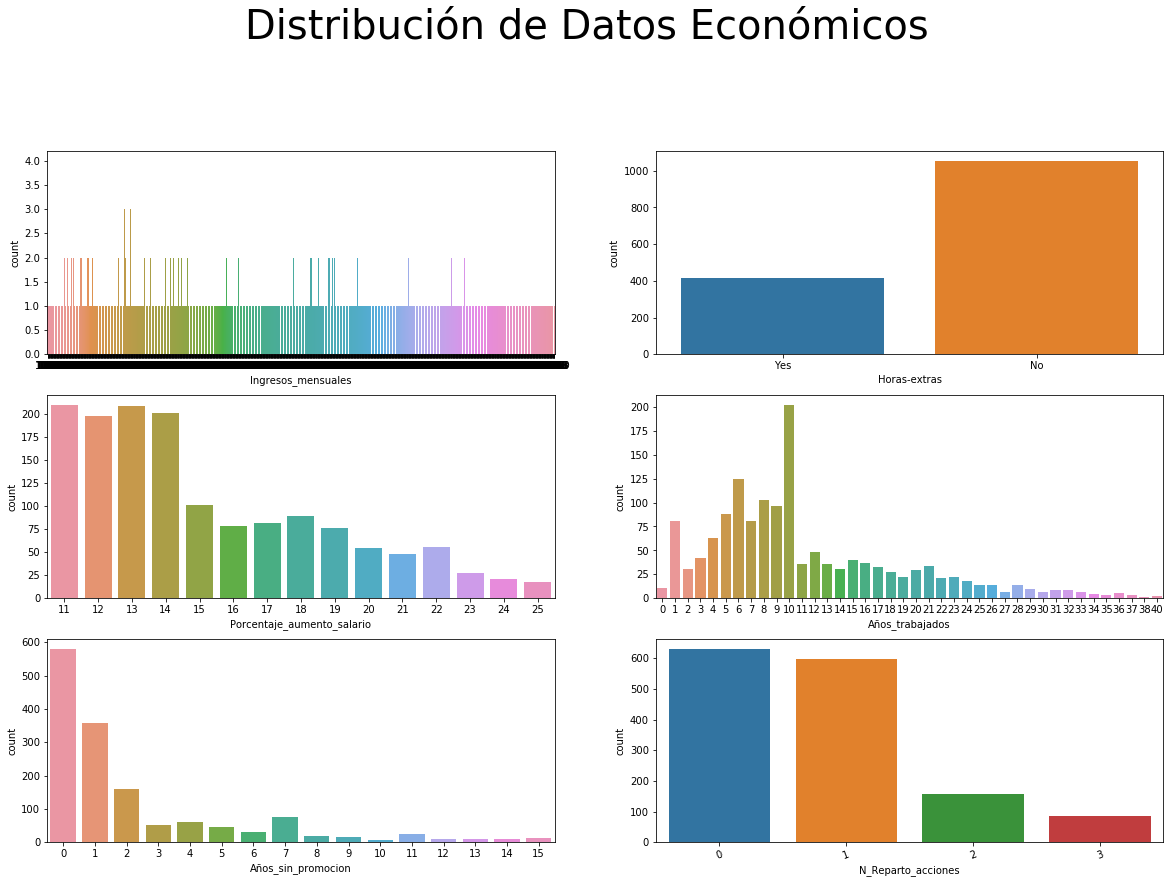

In [6]:
fig,ax = plt.subplots(3,2, figsize=(20,20))             
plt.suptitle("Distribución de Datos Económicos", fontsize=40)
sns.countplot(datasetRH['Ingresos_mensuales'], ax = ax[0,0]) 
sns.countplot(datasetRH['Horas-extras'], ax = ax[0,1])
sns.countplot(datasetRH['Porcentaje_aumento_salario'], ax = ax[1,0]) 
sns.countplot(datasetRH['Años_trabajados'], ax = ax[1,1])
sns.countplot(datasetRH['Años_sin_promocion'], ax = ax[2,0])
sns.countplot(datasetRH['N_Reparto_acciones'], ax = ax[2,1])
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

**Análisis Datos Económicos**

**Ingresos mensuales:** En esta gráfica no se puede sacar muchas conclusiones, por lo que analizaremos este indicador mas adelante.

**Horas extras:** Existe un alto grado de horas extras. Habría que analizar los ingresos de estas horas extras y el grado de satisfacción de los empleados, ya que es un tiempo que se lo tienen que quitar de su tiempo personal y puede afectar en el grado de abandono.

**Porcentaje aumento salario:** El porcentaje de aumento salarial anual es relativamente alto, ya que va desde el 11 % al  25 %. Si consideramos que son datos recientes, y nos situamos dentro del sector de las TIC es un indicador muy positivo para los empleados.

**Años trabajados:** Este indicador tambien parece positivo ya que si consideramos que un alto porcentaje de empleados se han incoporado en los ultimos 10 años y lo comparamos con los años de antigüedad en la compañía, la mayoria de los empleados que comenzaron siguen en dicha compañía. 

**Años sin promoción:** De nuevo este indicador parece ser positivo, ya que un alto porcentaje de empleados son promocionados en menos de 3 años. Este indicador puede ser debido a que en los ultimos 10 años ha habido un alto porcentaje de incorporaciones en la compañía.

**Nº Reparto acciones:** El reparto de acciones solo parece afectar a la mitad de la compañía (aproximadamente). 

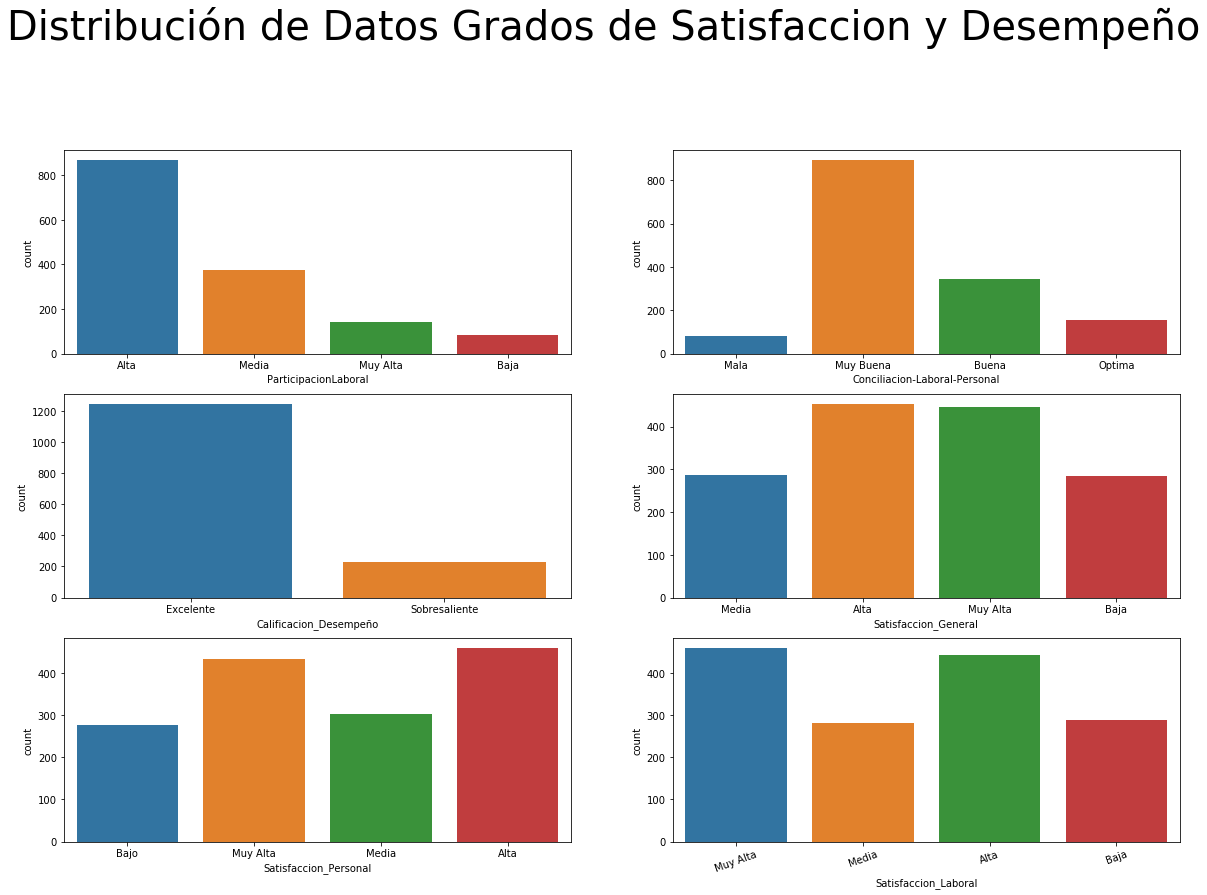

In [7]:
fig,ax = plt.subplots(3,2, figsize=(20,20))             
plt.suptitle("Distribución de Datos Grados de Satisfaccion y Desempeño", fontsize=40)
sns.countplot(datasetRH['ParticipacionLaboral'], ax = ax[0,0]) 
sns.countplot(datasetRH['Conciliacion-Laboral-Personal'], ax = ax[0,1])
sns.countplot(datasetRH['Calificacion_Desempeño'], ax = ax[1,0]) 
sns.countplot(datasetRH['Satisfaccion_General'], ax = ax[1,1])
sns.countplot(datasetRH['Satisfaccion_Personal'], ax = ax[2,0])
sns.countplot(datasetRH['Satisfaccion_Laboral'], ax = ax[2,1])
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

**Análisis Datos Grados de Satisfacción y Desempeño**
En este apartado vamos a analizar datos obtenidos de encuestas  realizadas por los propios empleados.En principio podríamos considerar que son los datos mas relevantes para poder llegar a conclusiones sobre el grado de abandono de la compañía y sobre como mejora la productividad de los empleados.

**Participación Laboral:** La participación laboral ,en general, es bastante alta. Lo que indica el grado de compromiso de la plantilla.

**Conciliación Laboral Personal:** La conciliación entre la parte laboral y personal es bastante buena, segun la valoración de los empleados.

**Calificación Desempeño:** La calificación del desempeño es muy alta. Habría que profundizar en este punto, ya que en muchas compañias este indicador sirve para cobrar objetivos y en este caso para que todos los empleados cumplan dichos objetivos las valoraciones suelen ser altas. Deberíamos mantener este indicador como no relevante dada su posible parcialidad y su grado de cumplimiento tan alto. 

**Satisfacción General:** En cuanto a la satisfacción general, es bastante llamativo el hecho que aunque la mayoría de los empelados tienen un grado de satisfacción alto o muy alto, hay un grupo de empleados considerable con un nivel de satisfacción es bajo. Habría que centrarse en este grupo de empleados para conocer los motivos de este bajo nivel de satisfacción.

**Satisfacción Personal:** Los valores de este indicador son muy parecidos al General.

**Satisfacción Laboral:** Los valores de este indicador son muy parecidos al General.

## Análisis de datos estadísticos

Analizaremos las variables numéricas mediante estadísticas descriptivas, de tal forma que tendremos una idea general de los datos del Dataset

In [8]:
# Obtenemos los Datos estadísticos
datasetRH.describe()

,Edad,Distancia_Casa,Id_empleado,Antiguedad_empresa,Antiguedad_puesto,Ingresos_mensuales,Tarifa_hora,Tarifa_Mes,Tarifa_Diaria,Porcentaje_aumento_salario,N_Reparto_acciones,Años_trabajados,Empleos_anteriores,Formacion_año_anterior,Años_sin_promocion,Años_Jefe_actual
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1024.865306,7.008163,4.229252,6502.931293,65.891156,14313.103401,802.485714,15.209524,0.793878,11.279592,2.693197,2.799320,2.187755,4.123129
std,9.135373,8.106864,602.024335,6.126525,3.623137,4707.956783,20.329428,7117.786044,403.509100,3.659938,0.852077,7.780782,2.498009,1.289271,3.222430,3.568136
min,18.000000,1.000000,1.000000,0.000000,0.000000,1009.000000,30.000000,2094.000000,102.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,491.250000,3.000000,2.000000,2911.000000,48.000000,8047.000000,465.000000,12.000000,0.000000,6.000000,1.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1020.500000,5.000000,3.000000,4919.000000,66.000000,14235.500000,802.000000,14.000000,1.000000,10.000000,2.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1555.750000,9.000000,7.000000,8379.000000,83.750000,20461.500000,1157.000000,18.000000,1.000000,15.000000,4.000000,3.000000,3.000000,7.000000
max,60.000000,29.000000,2068.000000,40.000000,18.000000,19999.000000,100.000000,26999.000000,1499.000000,25.000000,3.000000,40.000000,9.000000,6.000000,15.000000,17.000000


**Análisis de datos Estadísticos:**

**Edad:** La media de edad es 36,9 años. Podemos considerar que es una media adecuada ya que combina empleados jovenes pero con años de experiencia.

**Distancia al trabajo:** Siendo la media 9 km inicialmente estaría bien, aunque habría que ver si los medios de locomocion son adecuados.

**Antigüedad:** 7 años de media de antigüedad suele indicar que hay cierta estabilidad, ya que las empresas TIC suelen tener un grado de rotación bastante alto. Se analizará posteriormente con la tasa de abandono.Parece indicar que hay muchas incorporaciones en los ultimos años.

**Ingresos:** Los ingresos del primer percentil son muy bajos. Pudiera corresponder a empelados que están en prácticas. El resto de empleados parece que tienen ingresos dentro de los valores habituales. Parece que hay un equilibrio entre los percentiles 2,3 y 4.

**Resto de valores:** El resto de valores parecen estar dentro de la normalidad.

## Análisis de datos mediante correlación

Analizaremos las variables numéricas mediante un mapa de correlación, para conocer que variables son las que tienen un porcentaje mas alto de relación.

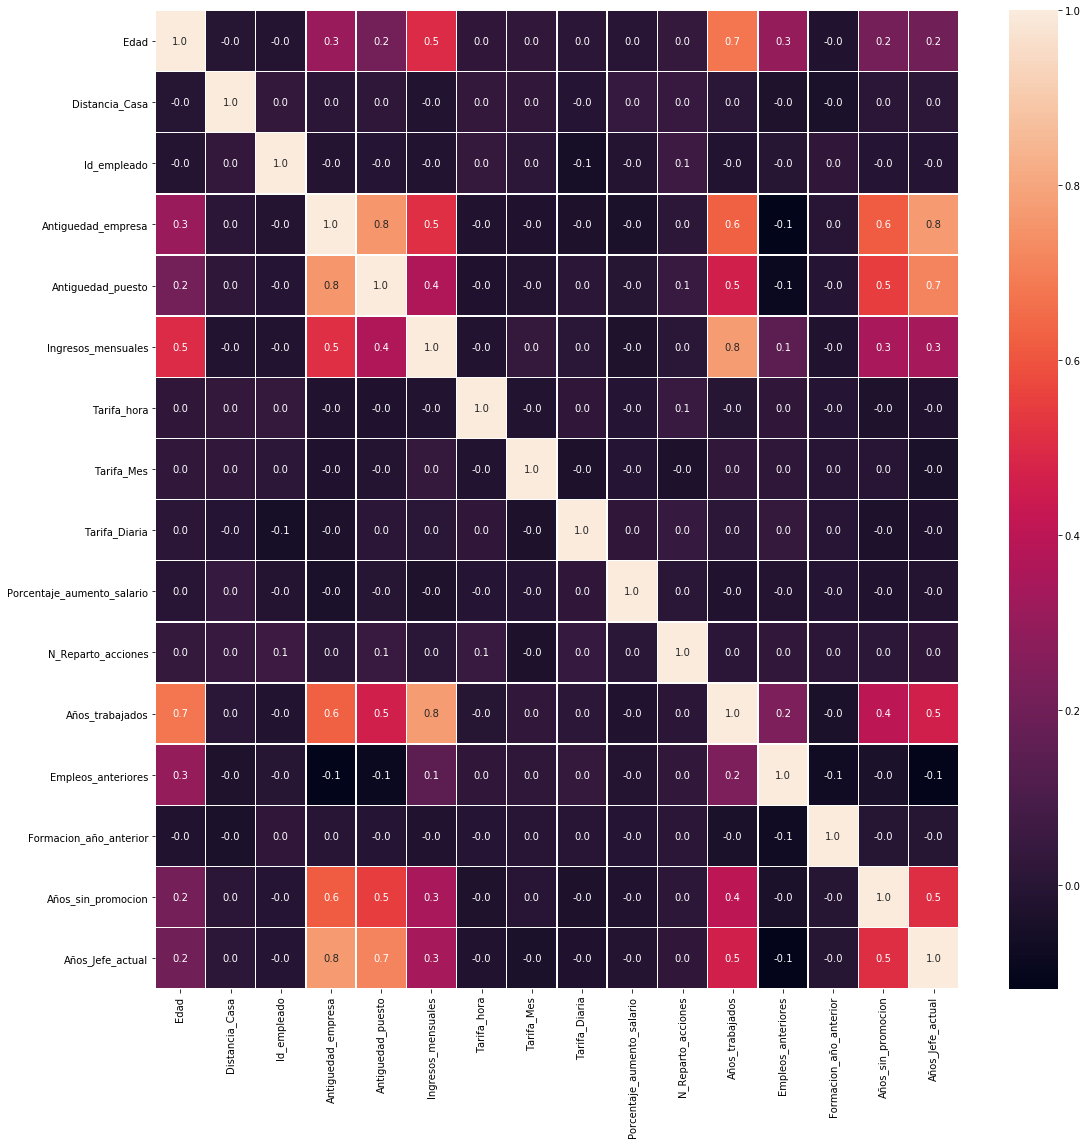

In [9]:
import matplotlib.pyplot as plt
# Mapa de Correlación de variables numericas
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(datasetRH.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**Análisis:** Vamos a considerar que dos variables son altamente correlacionadas cuando tienen un valor superior a 0.7. La gráfica de correlación entre todas las variables continuas indica las siguinetes correlaciones:

- Edad con los años trabajados.
- Antigüedad con la antigüedad en el puesto y con el jefe actual.
- Ingresos con los años trabajados

Los datos obtenidos paracen normales y dentro de los parámetros establecidos dentro de una compañía. 
Llama la atención que los ingresos mensuales no estén altamente correlacionados con la edad, ni con la antigüedad en la compañía o en el puesto

## Análisis mediante distribución

Vamos a comporbar la distrubución de las variables mas representativas como son: edad, Ingresos Mensuales, Años trabajados y Antiguedad en la empresa.

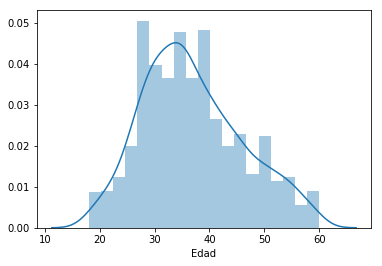

In [10]:
sns.distplot(datasetRH['Edad'])

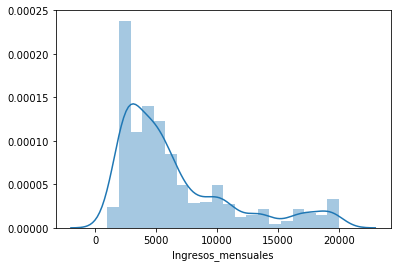

In [11]:
sns.distplot(datasetRH['Ingresos_mensuales'])

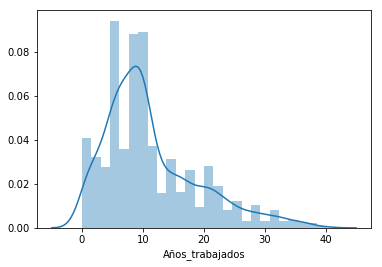

In [12]:
sns.distplot(datasetRH['Años_trabajados'])

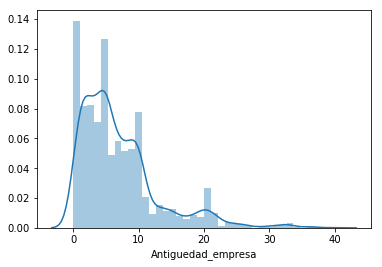

In [13]:
sns.distplot(datasetRH['Antiguedad_empresa'])

**Análisis:**

**Edad:** La edad esta concentrada en el intervalo de los 25-45 años. Podemos interpretar que la plantilla esta compensada en cuanto a juventud y experiencia. A partir de los 40 años existe una distribucion casi proporcional entre la edad y el numero de empleados.

**Ingresos Mensuales:** Los ingresos no parecen estar distrubuidos proporcionalmente. Existe un grupo de empleados con sueldos muy bajos y en el intervalo de empleos que podemos considerar "medio-alto" no existe una distribución lineal como se podría esperar. Este es uno de los puntos que podría ser motivo de abandono.

**Años trabajados:** El intervalo donde se concentra la mayoría de los datos es de 0-15 años. No es una plantilla extremadamente joven y podemos considerarla con unos ratios de experiencia acordes con el sector.

**Antigüedad:** Segun los datos obtenidos para ser una empresa del sector de las TIC tienen una antigüedad aceptable.

## Análisis de Distribución de conjunto de datos.

La técnica de distribución por conjunto de datos nos permite ver donde y cómo se concentran los datos de varias variables. Vamos a coger 3 variables como son los Ingresos Mensuales, el porcentaje de aumento de salario y los años sin promoción y los vamos a comparar con la edad, la antigüedad en la empresa y la antigüedad en el puesto,

Para hacerlo utilizaremos la función kdeplot de la biblioteca de gráficos Seaborn y esto genera gráficos bivariados para tener otras perspectiva que nos favorezca el posterior análisis.

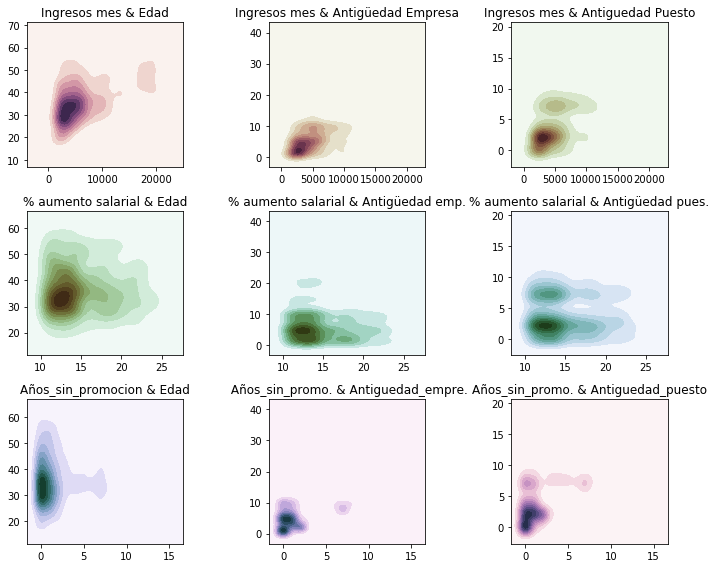

In [14]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Definimos la escala de colores para los gráficos
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generamos los plot
x = datasetRH['Ingresos_mensuales'].values
y = datasetRH['Edad'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Ingresos mes & Edad')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generamos los plot
x = datasetRH['Ingresos_mensuales'].values
y = datasetRH['Antiguedad_empresa'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Ingresos mes & Antigüedad Empresa')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generamos los plot
x = datasetRH['Ingresos_mensuales'].values
y = datasetRH['Antiguedad_puesto'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Ingresos mes & Antiguedad Puesto')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generamos los plot
x = datasetRH['Porcentaje_aumento_salario'].values
y = datasetRH['Edad'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = '% aumento salarial & Edad')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generamos los plot
x = datasetRH['Porcentaje_aumento_salario'].values
y = datasetRH['Antiguedad_empresa'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = '% aumento salarial & Antigüedad emp.')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generamos los plot
x = datasetRH['Porcentaje_aumento_salario'].values
y = datasetRH['Antiguedad_puesto'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = '% aumento salarial & Antigüedad pues.')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generamos los plot
x = datasetRH['Años_sin_promocion'].values
y = datasetRH['Edad'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Años_sin_promocion & Edad')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generamos los plot
x = datasetRH['Años_sin_promocion'].values
y = datasetRH['Antiguedad_empresa'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = ' Años_sin_promo. & Antiguedad_empre.')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generamos los plot
x = datasetRH['Años_sin_promocion'].values
y = datasetRH['Antiguedad_puesto'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'Años_sin_promo. & Antiguedad_puesto')

f.tight_layout()

**Análisis**

**Ingresos Mensuales:** Se puede observar que hay dos distribuciones. Una en la que los sueldos son muy altos y estan concentados en un grupo concreto y por otro lado está el resto de empleados que se encuentran mas dispersos. Parece que hay un gran salto en determinados empleados. No parece que haya casi empleados en el rango de los 12,000 - 18.000. Con respecto a la antigüedad en la empresa todos los datos están concentrados, cuando deberían estar distribuidos linealmente. Ocurre parecido con la antigúedad en el puesto.

**Aumento salarial:** Parece que el aumento salarial no es proporcional con respecto a la edad, pero si lo hace con la antigüedad de la empresa o del puesto. Parece como si hubiera un aumento salarial anual o periódico.

**Años sin promoción:** Suele haber promociones regularmente, salvo algunos casos que llevan mucho tiempo en el mismo puesto.

# Análisis de variables de alto impacto


A continuación vamos a analizar una serie de variables o conjunto de variables que tienen un gran impacto para la compañía; bien por el aspecto social, estratégico o empresarial.

## Composición de los recursos humanos

Como hemos deducido de nuestro primer análisis; el empleado promedio es de mediana edad (37 años). El 50% de los empleados tienen entre 30 y 43 años. La antigüedad promedio es de 7 años, pero la desviación estándar es importante (6 años), principalmente debido a los valores extremos: el tercer cuartil es de 9 años, mientras que el máximo es de 40 años de permanencia. En otras palabras, hay algunos valores atípicos. La gráfica muestra que una gran parte de la composición de los recursos humanos sigue siendo teniendo un compromiso con la empresa. 

In [15]:
datasetRH2 = datasetRH.copy()
datasetRH2.replace({'Abandono' : {'Si': 1, 'No': 0}}, inplace=True)

,Edad,Antiguedad_empresa,Años_trabajados
count,1470.000000,1470.000000,1470.000000
mean,36.923810,7.008163,11.279592
std,9.135373,6.126525,7.780782
min,18.000000,0.000000,0.000000
25%,30.000000,3.000000,6.000000
50%,36.000000,5.000000,10.000000
75%,43.000000,9.000000,15.000000
max,60.000000,40.000000,40.000000


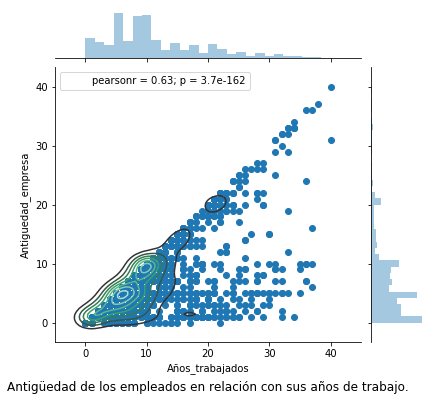

In [16]:
sns.jointplot(x="Años_trabajados", y="Antiguedad_empresa", 
              data=datasetRH2).plot_joint(sns.kdeplot)
plt.title("Antigüedad de los empleados en relación con sus años de trabajo.", y=-.2)
plt.subplots_adjust(bottom=.2)
datasetRH2[["Edad", "Antiguedad_empresa", "Años_trabajados"]].describe()

**Análisis:** En general, los empleados tienden a permanecer en la empresa. Por lo tanto, es recomendable que el departamento de RRHH se asegure de que los empleados estén lo suficientemente capacitados para mantener el desempeño durante varios años. Un indicador importante del desempeño es su formación. El departamento de recursos humanos debe asegurarse de que seleccionan a los candidatos con los antecedentes academicos y experiencia adecuados mientras mantienen una plantilla diversificada.

## Composición de empleados por género

La igualdad de género actualmente es un tema importante para todas las compañías. Algunos estudios sugieren que un lugar de trabajo más diverso aumenta el rendimiento de la empresa y la satisfacción general entre los empleados. Hoy en día, la mayoría de las empresas y los propios trabajadores están de acuerdo en que nuestra sociedad debe orientarse a un lugar de trabajo diverso donde hombres y mujeres estén representados y pagados por igual.

Segun hemos visto en análisis anteriores, los hombres están más representados que las mujeres en la empresa. La proporción de hombres y mujeres es de 60: 40 (lo que significa que hay 3 hombres por 2 mujeres). Aunque no llega a la paridad, al tratarse de una empresa de técnologia, pudieramos considera un dato similar al resto de empresas del sector. 
El dato mas preocupante, es que la representación de las mujeres disminuye después de alcanzar un cierto nivel de puesto de trabajo. Esto puede ser una señal de que existe un cierto nivel en el que no han llegado o no se deja promocionarse a las mujeres.

En la siguiente gráfica se muestra el reparto de hombres y mujeres en los diferentes departamentos de trabajo de la empresa. Observamos que el departamento donde la representación de los hombres con respecto a las mujeres es mas alto, es en el Departamento de Recursos Humanos, con más del doble de hombres que mujeres. Dicho esto, todos los departamentos tienen una mayor proporción de hombres que de mujeres.

In [17]:
def plot_gender_repartition(datasetRH2, **kwargs):
    caption = kwargs["caption"]; del kwargs["caption"]
    gender_repartition = datasetRH2.groupby([kwargs["index"], kwargs["columns"]],
                                            as_index=False).count().pivot(**kwargs)
    gender_repartition["Total"] = gender_repartition["Hombre"] + gender_repartition["Mujer"]
    gender_repartition["Mujer"] = gender_repartition["Mujer"] / gender_repartition["Total"] * 100
    gender_repartition["Hombre"] = gender_repartition["Hombre"] / gender_repartition["Total"] * 100
    gender_repartition[["Mujer", "Hombre"]].plot(kind="barh", stacked=True, legend=False)
    ax = plt.gca()
    ax.axvline(50, color="k", zorder=0)
    format_chart(ax, True)
    label_barh_chart(ax)
    plt.title("{} Distribución del Género por {}".format(caption, kwargs["index"]), y=-.2)
    plt.legend(bbox_to_anchor=(.7, 1.1), ncol=2)
    plt.subplots_adjust(left=.16, bottom=.2)
    
def format_chart(ax, multiline_labels=False, ticklabel_size=10):
    [spine.set_visible(False) for spine in ax.spines.values()]
    
    ax.yaxis.set_label_text("")
    [tl.set(fontsize=ticklabel_size) for tl in ax.get_yticklabels()]
    if multiline_labels:
        ylabels = ax.get_yticklabels()
        new_labels = [label.get_text()[::-1].replace(" ", "\n", 1)[::-1] for label in ylabels]
        ax.set_yticklabels(new_labels)
        
def label_barh_chart(ax):
    text_settings = dict(fontsize=9, fontweight='bold', color="w")
    rects = ax.patches
    for i, rect in enumerate(rects):
        width = rect.get_width()
        x_pos = width / 2 if i in range(len(rects) // 2) else 100 - width / 2
        label = "{:.1f}%".format(rect.get_width())
        ax.text(x_pos, rect.get_y() + rect.get_height()/2, label, ha='center', va='center',
                **text_settings)
        
def label_barchart(ax):
    text_settings = dict(fontsize=9, fontweight='bold', color="w")
    rects = ax.patches
    for i, rect in enumerate(rects):
        x_pos = rect.get_x() + rect.get_width() / 2
        label = "{:.1%}".format(rect.get_height())
        ax.text(x_pos, .05, label, ha='center', va='center', **text_settings)

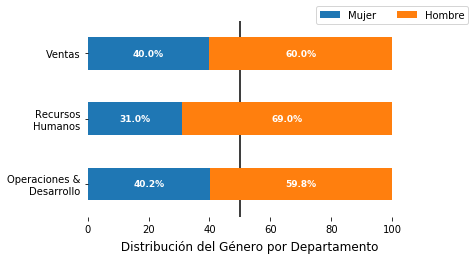

In [18]:
plot_gender_repartition(datasetRH2, index="Departamento", columns="Genero", 
                        values="Abandono", caption="")

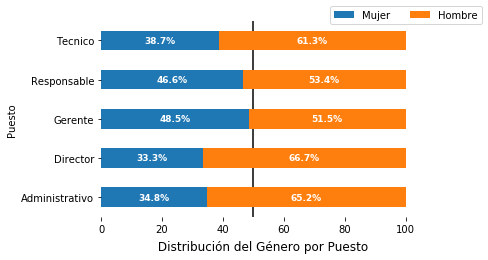

In [19]:
plot_gender_repartition(datasetRH2, index="Puesto", columns="Genero", values="Abandono", 
                        caption="")
plt.gca().set_ylabel("Puesto");

Otro punto importate despues de la distribución de hombre y mujeres es la remuneración que tienen en la misma posición

Un distribución desequilibrada entre hombres y mujeres no significa necesariamente que haya una brecha de ingresos entre los géneros. En la siguiente gráfica se observa este punto: para cualquier nivel de puesto de trabajo, vemos que la proporción entre salarios de hombres y mujeres es relativamente cercana a 1, lo que significa que las mujeres y los hombres reciben el mismo pago en esta empresa.

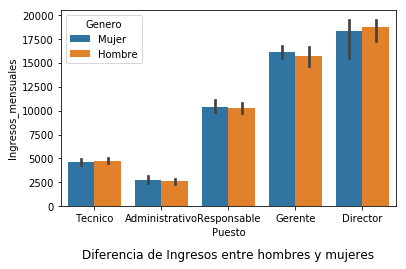

In [20]:
plt.figure()
sns.barplot(x="Puesto", y="Ingresos_mensuales", hue="Genero", data=datasetRH2, ci=99)
plt.title("Diferencia de Ingresos entre hombres y mujeres", y=-.3)
plt.subplots_adjust(bottom=.2);

## Relación de la formación con el desempeño
Otro punto importante es conocer la relación de la formación o experiencia con el grado de desempeño en función de los puestos de trabajo. Dado que solo tenemos calificaciones de desempeño excelentes y sobresalientes (3 y 4), analizaremos la proporción de los empleados sobresalientes en relación con la población con la misma combinación de formación y puesto laboral. Esto nos permite sacar conclusiones sobre las mejores coincidencias entre el puesto de trabajo y la formación.

In [21]:
# pasamos la variable Calificacion_desempeño a numérica
datasetRH2.replace({'Calificacion_Desempeño': {"Baja": 1, "Buena": 2,
                                               "Excelente": 3, "Sobresaliente": 4}},  
                                                inplace = True)

In [22]:
performance = datasetRH2.pivot_table(index=['Titulacion', 'Puesto'], 
                               columns='Calificacion_Desempeño', 
                               values='Abandono', aggfunc='count')

performance['%_mayor_desempeño'] = performance[4] / (performance[3] + performance[4])
performance.sort_values('%_mayor_desempeño', ascending=False).drop([3,4], axis=1).head(10)

,Calificacion_Desempeño,%_mayor_desempeño
Titulacion,Puesto,
Doctor,Director,0.500000
Tecnico,Administrativo,0.428571
Master,Administrativo,0.375000
Tecnico,Director,0.333333
Doctor,Responsable,0.250000
Tecnico,Gerente,0.250000
Doctor,Gerente,0.250000
Master,Gerente,0.240000
FP,Administrativo,0.210526


**Análisis:** La tabla anterior muestra los diez mejores valorados. Sorprendentemente, los empleados con un cierto tipo de antecedentes pueden desempeñarse muy bien en una posición mientras se desempeñan mal en otra posición. Por ejemplo, un doctorado tienen un alto nivel de desempeño si esta en el puesto de director y bajo si esta en los puestos de Gerente o Responsable. 

## Análisis del Grado de abandono

El grado de abandono de los empleados de una compañía puede dar a conocer aspectos que no están funcionando bien y que se deberían corregir. Otro aspecto importante es el posible deterioro del ambiente laboral y una posible mala imagen para la compañía, Por estos motivos es un indicador importante a analizar. 

In [23]:
# Mostrar el porcentaje de empleados que ha dejado la compañía
datasetRH.Abandono.value_counts(normalize=True)

No    0.838776
Si    0.161224
Name: Abandono, dtype: float64

**Comentario:** 
En una primera comprobación podemos observar que el grado de abandono es del 16 %. Es decir que de los 1.470 empleados analizados 237 abandonaron la compañía. De estos datos no podemos saber si son valores altos o bajos ya que desconocemos el intervalo temporal en el que se han recogido estos datos.

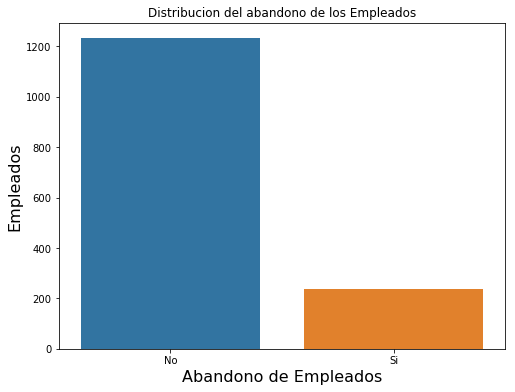

In [24]:
# Gráficamente el grado de abandono lo podemos ver en el siguiente gráfico
plt.figure(figsize=(8,6))
Abandono=datasetRH.Abandono.value_counts()
sns.barplot(x=Abandono.index ,y=Abandono.values)
plt.title('Distribucion del abandono de los Empleados')
plt.xlabel('Abandono de Empleados', fontsize=16)
plt.ylabel('Empleados', fontsize=16)

**Analisis de datos con Bar Plot**
A continuación utilizaremos la herramienta Bar Plot que nos permite comparar el grado de abandono con las variables que hemos podido detectar, anteriormente, que mas relación pueden tener con dicho abandono. 

In [25]:
BarPlot_columns=['Edad','Distancia_Casa','Puesto']

In [26]:

def Bar_plots(var):
    col=pd.crosstab(datasetRH[var],datasetRH.Abandono)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(12,4))
    plt.xticks(rotation=90)

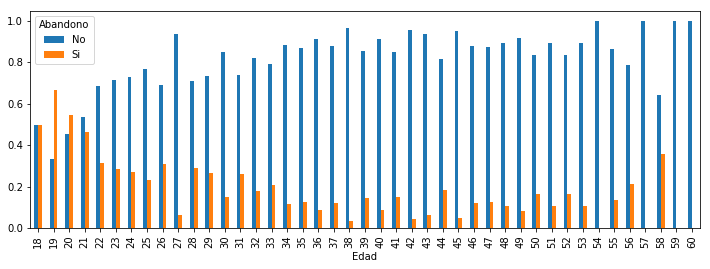

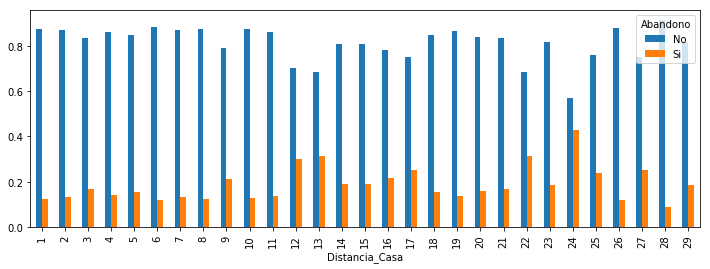

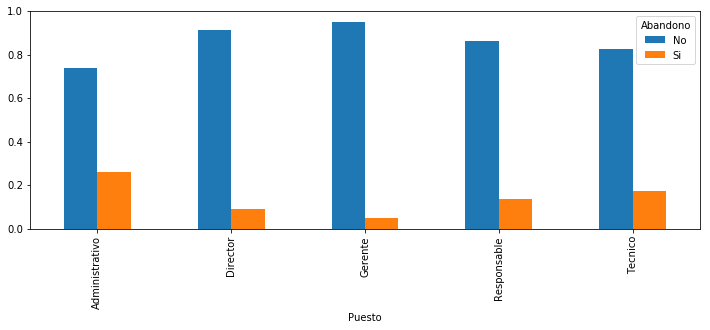

In [27]:
for col in BarPlot_columns:
    Bar_plots(col)

**Análisis** Tras analizar las graficas anteriores podemos ver que el porcentaje de abandono es muy alto en empleados con edades 18 y 21 años. Este dato es muy importante ya que podemos intuir que tambien estarían relacionados los ingresos mensual, tal y como hemos visto que estan correlacionados la edad y los ingresos. 

Para el caso de la distancia a casa, aunque hay grados de abandonos altos para los empleados que están a 12, 13 22 y 24, no parece que sea debido a la distancia, sino a datos puntuales.

En el caso del puesto, los administrativos y los tecnicos son los que mas abandonan la compañía.

**Análisis mediante tabulación cruzadas**

Con los datos que hemos obtenido de las gráficas anteriores vamos a comparar variables de forma que podamos obtener datos mas precisos del grado de bandono. 
Vamos a comparar alguna de las variables de los grados de satisfacción y desempeño y finalmente compararemos la edad, que parece que es uno de los datos claves para el abandono

In [28]:
pd.crosstab(columns=[datasetRH.Abandono],
            index=[datasetRH.Calificacion_Desempeño],margins=True,normalize='index') 

Abandono,No,Si
Calificacion_Desempeño,,
Excelente,0.839228,0.160772
Sobresaliente,0.836283,0.163717
All,0.838776,0.161224


In [29]:
pd.crosstab(columns=[datasetRH.Abandono],
            index=[datasetRH.Satisfaccion_General],margins=True,normalize='index') 

Abandono,No,Si
Satisfaccion_General,,
Alta,0.863135,0.136865
Baja,0.746479,0.253521
Media,0.850174,0.149826
Muy Alta,0.865471,0.134529
All,0.838776,0.161224


In [30]:
pd.crosstab(columns=[datasetRH.Abandono],
            index=[datasetRH.Puesto],margins=True, normalize='index') 

Abandono,No,Si
Puesto,,
Administrativo,0.739130,0.260870
Director,0.911111,0.088889
Gerente,0.950495,0.049505
Responsable,0.862069,0.137931
Tecnico,0.826087,0.173913
All,0.838776,0.161224


**Análisis** No parece que haya una relación directa entre la satisfacción general de los empleados o el grado de desempeño con el grado de abandono, como podria esperarse antes de realizar el análisis. Los empleados no parecen irse de la compañía por aspectos generales, laborales o prefesionales, sino por algun indicador puntual.
Por el contrario el puesto de trabajo si parece influir. Los empelados administrativos tienen un 26 % de abandono, seguidos por los tecnicos con un 17 %. 

In [31]:
pd.crosstab(columns=[datasetRH.Abandono],
            index=[datasetRH.Edad],margins=True,normalize='index') 

Abandono,No,Si
Edad,,
18,0.500000,0.500000
19,0.333333,0.666667
20,0.454545,0.545455
21,0.538462,0.461538
22,0.687500,0.312500
23,0.714286,0.285714
24,0.730769,0.269231
25,0.769231,0.230769
26,0.692308,0.307692


**Análisis:** Tras esta última tabla, podemos comprobar que la tasa mas alta de abandono está en la franja de edad de 18-21 años. Incluso la franja de 22 a 26 años tambien tiene una tasa de abando muy alta. 
Podemos concluir que el grado de abandono mas alto se produce en los empelados con las edades mas bajas.

Vamos a analizar gráficamente como afecta el grado de abandono en función de los ingresos mensuales, ya que es otro de los aspectos que mas hemos visto que influyen.  

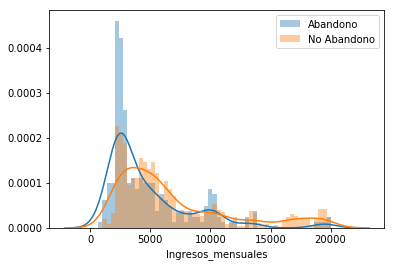

In [32]:
sns.distplot(datasetRH.Ingresos_mensuales[datasetRH.Abandono == 'Si'], 
             bins = np.linspace(0,20000,60))
sns.distplot(datasetRH.Ingresos_mensuales[datasetRH.Abandono == 'No'], 
             bins = np.linspace(0,20000,60))
plt.legend(['Abandono','No Abandono'])

**Análisis:** Se puede concluir que los empleados jóvenes con salarios bajos tienen unos porcentajes de abandono muy altos. Por lo tanto la edad y los ingresos mensuales son los indicadores que mas influyen en el % de abandono de la compañía 

## Conclusiones

El resumen de las conclusiones mas importantes a las que se ha llegado en esta fase de exploración y análisis de los datos del DataSet utilizado son las siguientes:

- Plantilla con empleados jóvenes y con bastante experiencia y formación.
- Grados de satisfacción de los empleados es alto.
- Aumentos salariales altos (11-25 % anuales).
- Promociones de puestos de media cada año.
- Igualdad de género: Aunque existe un cierto equilibrio en la distribición de género de los empleados de la compañía, a medida que el puesto es mas alto va descendiendo el porcentaje de mujeres. 
- Porcentaje de Abandono: El porcentaje de abandono se produce en empelados con poca edad (18-23) y con sueldos bajos. Los puestos mas afcetados por el abandono son los de administración y Técnicos.
- Distribución de los ingresos no parece la adecuada ya que hay un grupo de empleados con sueldos muy bajos, mientras que el resto de los empleados de la compañía disfrutan de sueldos altos con incrementos salariales periódicos y elevados.
